# Weekly activities
1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?
2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.
3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

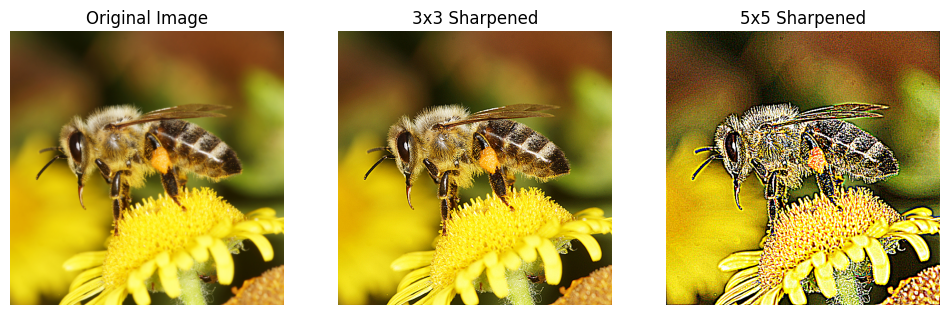

True

In [1]:
#Ans for Q1:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('native-bee.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Define the 3x3 sharpening kernel
kernel_3x3 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Define the 5x5 sharpening kernel
kernel_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 25, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
])

# Apply the 3x3 kernel
sharpened_3x3 = cv2.filter2D(image_rgb, -1, kernel_3x3)

# Apply the 5x5 kernel
sharpened_5x5 = cv2.filter2D(image_rgb, -1, kernel_5x5)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('3x3 Sharpened')
plt.imshow(sharpened_3x3)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('5x5 Sharpened')
plt.imshow(sharpened_5x5)
plt.axis('off')

plt.show()

# Save the results
cv2.imwrite('sharpened_3x3.png', cv2.cvtColor(sharpened_3x3, cv2.COLOR_RGB2BGR))
cv2.imwrite('sharpened_5x5.png', cv2.cvtColor(sharpened_5x5, cv2.COLOR_RGB2BGR))


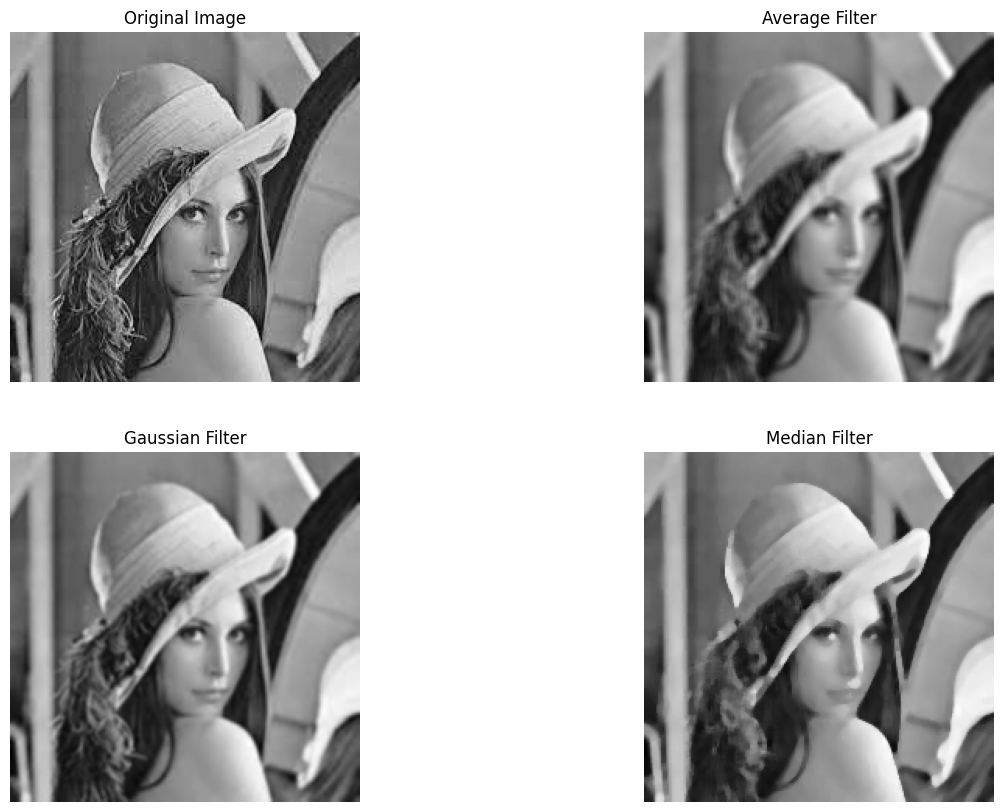

True

In [2]:
#Ans for Q2:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('lena.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for smoothing

# Apply Average Filter
average_filter = cv2.blur(image_gray, (5, 5))

# Apply Gaussian Filter
gaussian_filter = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Apply Median Filter
median_filter = cv2.medianBlur(image_gray, 5)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Average Filter')
plt.imshow(average_filter, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Gaussian Filter')
plt.imshow(gaussian_filter, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Median Filter')
plt.imshow(median_filter, cmap='gray')
plt.axis('off')

plt.show()

# Save the results
cv2.imwrite('average_filter.jpg', average_filter)
cv2.imwrite('gaussian_filter.jpg', gaussian_filter)
cv2.imwrite('median_filter.jpg', median_filter)


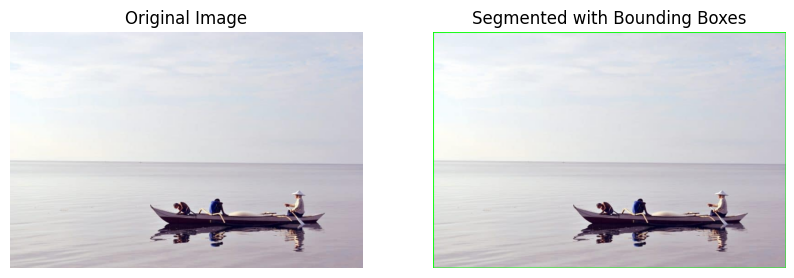

True

In [3]:
#Ans for Q3:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('boat.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected contours
image_bboxes = image.copy()
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_bboxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the results
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented with Bounding Boxes')
plt.imshow(cv2.cvtColor(image_bboxes, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# Save the result with bounding boxes
cv2.imwrite('boat_with_bboxes.jpg', image_bboxes)
